# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug
!pip install torch --no-cache-dir
import smdebug.pytorch as smd
import sagemaker
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,)
from sagemaker.pytorch import PyTorch
import gzip 
import numpy as np
import random
import os
import argparse
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import IPython
import io
from sagemaker.debugger import Rule, ProfilerRule, rule_configs, CollectionConfig
from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.debugger import Rule, DebuggerHookConfig, TensorBoardOutputConfig, CollectionConfig, ProfilerRule, rule_configs
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor
from PIL import Image
from IPython import display

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDep

In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
region = "us-east-1"
# Command to download and unzip data
##!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
##!unzip dogImages.zip
bucket = 'sagemaker-studio-7ch7kdabe7c'
#os.environ["Project_S3"] = bucket
##inputs = sagemaker_session.upload_data(path='/root/CD0387-deep-learning-topics-within-computer-vision-nlp-project-starter/dogImages', bucket=bucket, prefix = "dogImages")

#!aws s3 sync ./dogImages s3://${Project_S3}/dogImages/

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [7]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {"lr": ContinuousParameter(0.01, 0.10), "batch_size": CategoricalParameter([16,32,64,128])}
obj_metric_name = "Test Loss"
obj_type = "Minimize"
metric_defs = [{"Name": "Test Loss", "Regex": "Testing Loss: ([0-9\\.]+)"}]

In [8]:
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo.py",
    base_job_name = 'dog_breed_tuning',
    role=role,
    py_version='py3',
    framework_version="1.4.0",
    instance_count=1,
    instance_type="ml.g4dn.xlarge"
    )# TODO: Your estimator here

tuner = HyperparameterTuner(
    estimator,
    obj_metric_name,
    hyperparameter_ranges,
    metric_defs,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=obj_type,)# TODO: Your HP tuner here

In [16]:
training_path= "s3://{}/{}/".format(bucket, "dogImages")
s3_output_dir = "s3://{}/{}/".format(bucket, "output")
s3_model_dir = "s3://{}/{}/".format(bucket, "model")
os.environ['SM_CHANNEL_TRAIN']=training_path
os.environ['SM_MODEL_DIR']=s3_model_dir
os.environ['SM_OUTPUT_DATA_DIR']=s3_output_dir

# TODO: Fit your HP Tuner
tuner.fit({'train' : training_path},wait=True) # TODO: Remember to include your data channels

........................................................................................................................................................................................................................................................................................................................................................................................................................!


In [17]:
tuner.best_estimator()


2022-02-13 21:54:21 Starting - Preparing the instances for training
2022-02-13 21:54:21 Downloading - Downloading input data
2022-02-13 21:54:21 Training - Training image download completed. Training in progress.
2022-02-13 21:54:21 Uploading - Uploading generated training model
2022-02-13 21:54:21 Completed - Training job completed


In [18]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()#TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-02-13 21:54:21 Starting - Preparing the instances for training
2022-02-13 21:54:21 Downloading - Downloading input data
2022-02-13 21:54:21 Training - Training image download completed. Training in progress.
2022-02-13 21:54:21 Uploading - Uploading generated training model
2022-02-13 21:54:21 Completed - Training job completed


{'_tuning_objective_metric': '"Test Loss"',
 'batch_size': '"16"',
 'lr': '0.006661472030295597',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"dog_breed_tuning-2022-02-13-21-43-27-124"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-809651239335/dog_breed_tuning-2022-02-13-21-43-27-124/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [19]:
# TODO: Set up debugging and profiling rules and hooks

rules = [Rule.sagemaker(rule_configs.vanishing_gradient()),
        Rule.sagemaker(rule_configs.overfit()),
        Rule.sagemaker(rule_configs.overtraining()),
        Rule.sagemaker(rule_configs.poor_weight_initialization()),
        ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
        ]
collection_config = [CollectionConfig(name = "CrossEntropyLoss_output_0", parameters = {"include_regex": "CrossEntropyLoss_output_0", "train.save_interval": "10", "eval.save_interval": "1" })]

profiler_config = ProfilerConfig(system_monitor_interval_millis = 1000, framework_profile_params = FrameworkProfile(num_steps = 1))
debugger_config = DebuggerHookConfig(collection_configs = collection_config)

In [27]:
# TODO: Create and fit an estimator
hyperparams = {"batch_size": "32", "lr":"0.0013439939513439198" }

estimator = PyTorch(
    entry_point="train_model.py",
    role=role,
    py_version='py3',
    framework_version="1.4.0",
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    hyperparameters = hyperparams,
    profiler_config = profiler_config,
    debugger_hook_config = debugger_config,
    rules = rules)
estimator.fit({"train": training_path}, wait = True)

    
    
    # TODO: Your estimator here

2022-02-14 00:28:08 Starting - Starting the training job...
2022-02-14 00:28:25 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
......
2022-02-14 00:29:35 Downloading - Downloading input data............
2022-02-14 00:31:36 Training - Downloading the training image...
2022-02-14 00:32:08 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-02-14 00:32:05,318 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2022-02-14 00:32:05,343 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-02-14 00:32:05,347 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-02-14 00:32:05,768 sagemaker-containers INFO     Module default_u

KeyboardInterrupt: 

In [152]:
# TODO: Plot a debugging output.

training_job = estimator.latest_training_job.name
print('Training job name:', training_job)
print('Region:', region)
trial = create_trial(estimator.latest_job_debugger_artifacts_path())
print(trial.tensor_names())
print(len(trial.tensor('CrossEntropyLoss_output_0').steps(mode = ModeKeys.TRAIN)))
print(len(trial.tensor('CrossEntropyLoss_output_0').steps(mode = ModeKeys.EVAL)))
tensor_name = "CrossEntropyLoss_output_0"


Training job name: pytorch-training-2022-02-13-07-53-01-007
Region: us-east-1
[2022-02-13 09:50:00.322 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-809651239335/pytorch-training-2022-02-13-07-53-01-007/debug-output
[2022-02-13 09:50:06.578 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2022-02-13 09:50:07.609 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:18 INFO trial.py:210] Loaded all steps
['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight', 'gradient/ResNet_fc.2.bias', 'gradient/ResNet_fc.2.weight', 'gradient/ResNet_fc.4.bias', 'gradient/ResNet_fc.4.weight', 'gradient/ResNet_fc.6.bias', 'gradient/ResNet_fc.6.weight', 'layer1.0.relu_input_0', 'layer1.0.relu_input_1', 'layer1.1.relu_input_0', 'layer1.1.relu_input_1', 'layer2.0.relu_input_0', 'layer2.

In [155]:
def get_step_value(trail, tname, mode):
    tensor = trial.tensor(tname)
    stepnum = tensor.steps(mode = mode)
    values = []
    for i in stepnum:
        values.append(tensor.value(i, mode = mode))
    return stepnum, values
get_step_value(trial, tensor_name, mode = ModeKeys.TRAIN)

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200,
  210,
  220,
  230,
  240,
  250,
  260,
  270,
  280,
  290,
  300,
  310],
 [array(4.955636, dtype=float32),
  array(4.882281, dtype=float32),
  array(5.1761427, dtype=float32),
  array(5.382594, dtype=float32),
  array(5.908573, dtype=float32),
  array(6.325986, dtype=float32),
  array(6.6440096, dtype=float32),
  array(6.8028083, dtype=float32),
  array(6.8630805, dtype=float32),
  array(7.0118613, dtype=float32),
  array(7.187437, dtype=float32),
  array(4.508256, dtype=float32),
  array(4.592927, dtype=float32),
  array(4.5796337, dtype=float32),
  array(4.9297075, dtype=float32),
  array(5.045237, dtype=float32),
  array(5.2626038, dtype=float32),
  array(5.28147, dtype=float32),
  array(5.4526134, dtype=float32),
  array(5.585347, dtype=float32),
  array(5.6907907, dtype=float32),
  array(4.7142186, dtype=float32),
  array(4.8688407, dtype=flo

loaded TRAIN data
loaded EVAL data
TRAIN plot
EVAL plot


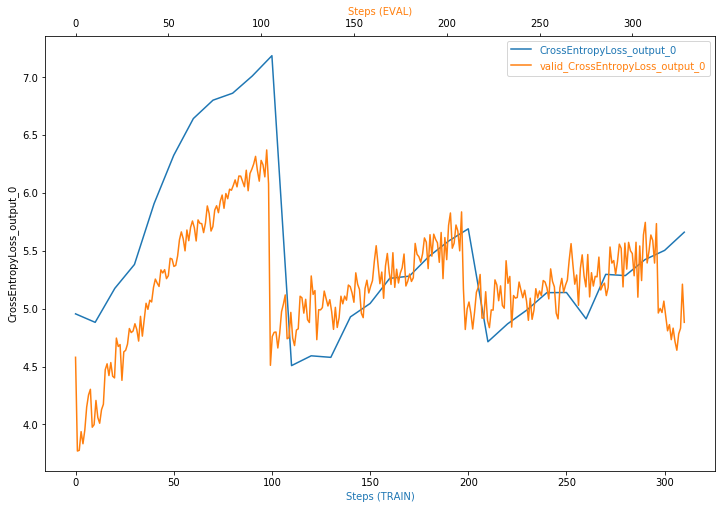

In [242]:
def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_step_value(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_step_value(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(12, 8))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="valid_" + tensor_name)
    print("EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()
    
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

I do think there is some anomalous behaviour; the loss are very very zigzagingly decreasing, not very stable.
I would fix this by updating our model, with another pretrained model and maybe larger hyperparameter ranges.

In [160]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(rule_output_path)

s3://sagemaker-us-east-1-809651239335/pytorch-training-2022-02-13-07-53-01-007/rule-output


In [240]:
# TODO: Display the profiler output
profiler_report_name = [r["RuleConfigurationName"]
    for r in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in r["RuleConfigurationName"]][0]
IPython.display.HTML(filename= profiler_report_name + "/profiler-output/profiler-report.html")
## The Ipython Display HTML function doesn't work for me, but the report is in this directory
##'s3://sagemaker-us-east-1-809651239335/pytorch-training-2022-02-13-07-53-01-007/rule-output/ProfilerReport/profiler-output/profiler-report.html'


FileNotFoundError: [Errno 2] No such file or directory: 'ProfilerReport/profiler-output/profiler-report.html'

## Model Deploying

In [21]:
# TODO: Deploy your model to an endpoint
model_location=estimator.model_data
jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()


class ImagePredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=jpeg_serializer,
            deserializer=json_deserializer,
        )
pytorch_model = PyTorchModel(model_data=model_location, role=role, entry_point='end_point.py',py_version='py3',
                             framework_version='1.4',
                             predictor_cls=ImagePredictor) 
predictor = pytorch_model.deploy(initial_instance_count=1, instance_type='ml.g4dn.xlarge')
# TODO: Add your deployment configuration like instance type and number of instances

--------!

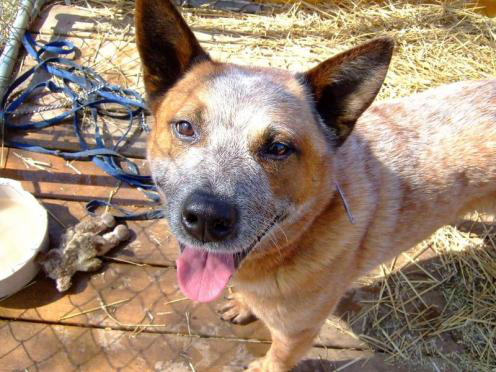

In [22]:
# TODO: Run an prediction on the endpoint

image = open("./testpic.jpg", "rb").read()
Image.open(io.BytesIO(image))

In [23]:
# TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(image, initial_args = {"ContentType": "image/jpeg"})
np.argmax(response, 1)

InternalFailure: An error occurred (InternalFailure) when calling the InvokeEndpoint operation (reached max retries: 4): An exception occurred while sending request to model. Please contact customer support regarding request b4ad5220-5743-4ea5-b4e6-337335be09ab.

In [28]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()